In [1]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import nltk 
import pickle
import sklearn.metrics
# import gensim # representing documents as semantic vectors
from sklearn.metrics import *

from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# Load the classifier from the file
with open('../../../sentiment140/Training/naive_bayes/Naive_Bayes_without_stopwords_classifier.pkl', 'rb') as file:
    classifier = pickle.load(file)

# Check if the classifier is loaded correctly
print(classifier)

In [4]:
df_test_naive_bayes_with_stopwords = pd.read_csv('../../../../Data-Preparation/sentiment140/testdata_without_stopwords_preprocessed.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../Data-Preparation/testdata_without_stopwords_preprocessed.csv'

In [ ]:
df_test_naive_bayes_with_stopwords.head()

,Text,target,Ground_Truth_Label
0,would like even little bit time work Laying 11 30 work 12 30 8 30,0,negative
1,Looking forward keeping touch Naomi long time since chatted,4,positive
2,Germany NBA airtime got International LP watch game sure,0,negative
3,future trouble favourite Bagley probably Running Blind Iceland Terrific,4,positive
4,know reason Opera popular mobile platform Firefox rocks ass,4,positive


In [ ]:
df_test_naive_bayes_with_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>      318365
<class 'float'>      1635
Name: count, dtype: int64

In [ ]:
df_test_naive_bayes_with_stopwords['Text'] = df_test_naive_bayes_with_stopwords['Text'].astype(str)


In [ ]:
df_test_naive_bayes_with_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>    320000
Name: count, dtype: int64

In [ ]:
def extract_features(text):
    words = word_tokenize(text)
    features = {word.lower(): True for word in words if word.isalpha()}
    return features


In [ ]:
df_test_naive_bayes_with_stopwords['features'] = df_test_naive_bayes_with_stopwords['Text'].apply(lambda text: extract_features(str(text)))

In [ ]:
df_test_naive_bayes_with_stopwords.head()

,Text,target,Ground_Truth_Label,features
0,would like even little bit time work Laying 11 30 work 12 30 8 30,0,negative,"{'would': True, 'like': True, 'even': True, 'little': True, 'bit': True, 'time': True, 'work': True, 'laying': True}"
1,Looking forward keeping touch Naomi long time since chatted,4,positive,"{'looking': True, 'forward': True, 'keeping': True, 'touch': True, 'naomi': True, 'long': True, 'time': True, 'since': True, 'chatted': True}"
2,Germany NBA airtime got International LP watch game sure,0,negative,"{'germany': True, 'nba': True, 'airtime': True, 'got': True, 'international': True, 'lp': True, 'watch': True, 'game': True, 'sure': True}"
3,future trouble favourite Bagley probably Running Blind Iceland Terrific,4,positive,"{'future': True, 'trouble': True, 'favourite': True, 'bagley': True, 'probably': True, 'running': True, 'blind': True, 'iceland': True, 'terrific': True}"
4,know reason Opera popular mobile platform Firefox rocks ass,4,positive,"{'know': True, 'reason': True, 'opera': True, 'popular': True, 'mobile': True, 'platform': True, 'firefox': True, 'rocks': True, 'ass': True}"


In [ ]:

df_test_naive_bayes_with_stopwords['Prediction'] = df_test_naive_bayes_with_stopwords['features'].apply(classifier.classify)

In [ ]:
# Berechnung der Metriken
accuracy = accuracy_score(df_test_naive_bayes_with_stopwords['Ground_Truth_Label'], df_test_naive_bayes_with_stopwords['Prediction'])
precision = precision_score(df_test_naive_bayes_with_stopwords['Ground_Truth_Label'], df_test_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
recall = recall_score(df_test_naive_bayes_with_stopwords['Ground_Truth_Label'], df_test_naive_bayes_with_stopwords['Prediction'], pos_label='positive')
f1 = f1_score(df_test_naive_bayes_with_stopwords['Ground_Truth_Label'], df_test_naive_bayes_with_stopwords['Prediction'], pos_label='positive')

In [ ]:
# Ausgabe der Metriken
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.76
Precision: 0.79
Recall: 0.71
F1 Score: 0.75


In [ ]:
# Vollständiger Bericht
print("\nClassification Report:\n")
print(classification_report(df_test_naive_bayes_with_stopwords['Ground_Truth_Label'], df_test_naive_bayes_with_stopwords['Prediction'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.74      0.82      0.78    160000
    positive       0.79      0.71      0.75    160000

    accuracy                           0.76    320000
   macro avg       0.77      0.76      0.76    320000
weighted avg       0.77      0.76      0.76    320000



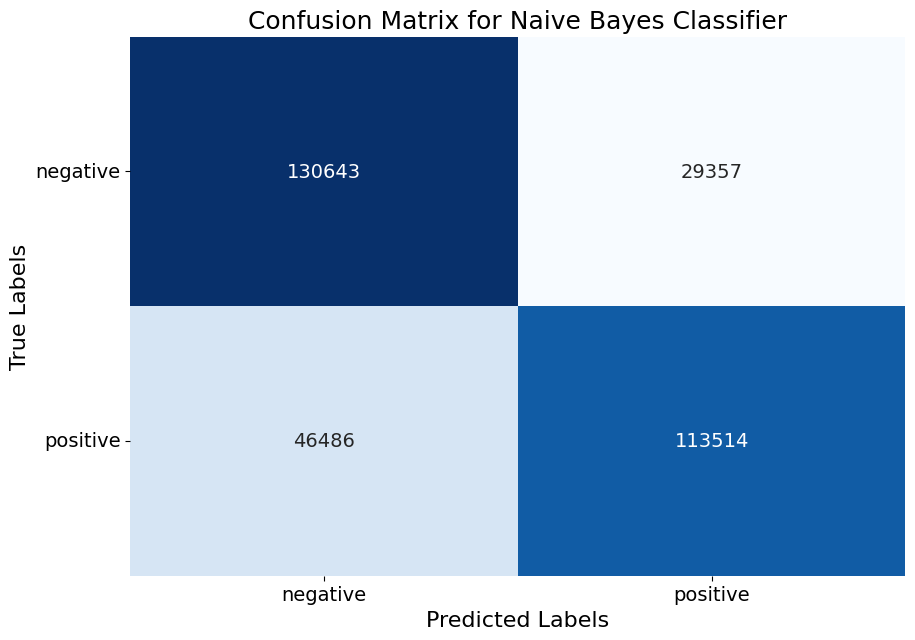

In [ ]:
cm_nb = confusion_matrix(df_test_naive_bayes_with_stopwords['Ground_Truth_Label'], df_test_naive_bayes_with_stopwords['Prediction'])


# Erstellen der Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Naive Bayes Classifier', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()